In [26]:
#importing libraries
import pandas as pd #using pandas instead of pyspark as volume is not much
import numpy as np
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import random
import pandas as pd
import warnings
# Define the list of students and exam types
students = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']
exams = ['Midterm 1', 'Midterm 2', 'Final']

# Dictionary to store DataFrames for each student
dict_of_df = {}

# Dictionary containing exam grades for each student
grades = {
    "S1": {
        "Midterm 1": 78,
        "Midterm 2": 82,
        "Final": 182
    },
    "S2": {
        "Midterm 1": 82,
        "Midterm 2": 85,
        "Final": 180
    },
    "S3": {
        "Midterm 1": 77,
        "Midterm 2": 90,
        "Final": 188
    },
    "S4": {
        "Midterm 1": 75,
        "Midterm 2": 77,
        "Final": 149
    },
    "S5": {
        "Midterm 1": 67,
        "Midterm 2": 77,
        "Final": 157
    },
    "S6": {
        "Midterm 1": 71,
        "Midterm 2": 64,
        "Final": 175
    },
    "S7": {
        "Midterm 1": 64,
        "Midterm 2": 33,
        "Final": 110
    },
    "S8": {
        "Midterm 1": 92,
        "Midterm 2": 88,
        "Final": 184
    },
    "S9": {
        "Midterm 1": 80,
        "Midterm 2": 39,
        "Final": 126
    },
    "S10": {
        "Midterm 1": 89,
        "Midterm 2": 64,
        "Final": 116
    }
}

# Function to combine sensor data with exam grades for a single student
def combine_data_for_student(sensor_data, exam_grades):
    """
    Combine sensor data with exam grades for a single student into a single DataFrame.

    Parameters:
        sensor_data (pd.DataFrame): DataFrame containing sensor data for a single student.
        exam_grades (dict): Dictionary containing exam grades for the student.

    Returns:
        pd.DataFrame: Combined DataFrame containing sensor data and exam grades.
    """
    # Create a DataFrame to store combined data
    combined_data = pd.DataFrame()

    # Iterate over each exam type and add grades to sensor data
    for exam_type, grade in exam_grades.items():
        # Filter sensor data for the current exam type
        sensor_data_exam = sensor_data[sensor_data['ExamType'] == exam_type].copy()

        # Add the 'ExamType' column to the filtered data
        sensor_data_exam.loc[:, 'ExamType'] = exam_type

        # Add the grade column to the sensor data
        sensor_data_exam['Grades'] = grade

        # Concatenate the current exam data with the combined data
        combined_data = pd.concat([combined_data, sensor_data_exam], ignore_index=True)

    return combined_data


# Processing sensor data for each student
for student in students:
    # Initialize DataFrames for each sensor
    TEMP = pd.DataFrame(columns=['ExamType', 'temp'])
    HR = pd.DataFrame(columns=['hr'])
    ACC = pd.DataFrame(columns=['xaxis', 'yaxis', 'zaxis'])
    EDA = pd.DataFrame(columns=['eda'])
    BVP = pd.DataFrame(columns=['bvp'])

    # Iterate over exam types
    for exam in exams:
        # Read sensor data files for the current exam type
        if exam == 'Final':
            temp = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/Final/TEMP.csv', names=['temp'])
            hr = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/Final/HR.csv', names=['hr'])
            acc = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/Final/ACC.csv', names=['xaxis', 'yaxis', 'zaxis'])
            eda = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/Final/EDA.csv', names=['eda'])
            bvp = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/Final/BVP.csv', names=['bvp'])
            temp = temp.iloc[2::8, :]
            hr = hr.iloc[2::2, :]
            acc = acc.iloc[2::64, :]
            eda = eda.iloc[2::8, :]
            bvp = bvp.iloc[2::88, :]
        else:
            temp = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/{exam}/TEMP.csv', names=['temp'])
            hr = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/{exam}/HR.csv', names=['hr'])
            acc = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/{exam}/ACC.csv', names=['xaxis', 'yaxis', 'zaxis'])
            eda = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/{exam}/EDA.csv', names=['eda'])
            bvp = pd.read_csv(f'/content/drive/MyDrive/Data/{student}/{exam}/BVP.csv', names=['bvp'])
            temp = temp.iloc[2::4, :]
            hr = hr.iloc[2::1, :]
            acc = acc.iloc[2::32, :]
            eda = eda.iloc[2::4, :]
            bvp = bvp.iloc[2::44, :]



        # Add ExamType column and concatenate the data
        temp['ExamType'] = exam
        TEMP = pd.concat([TEMP, temp], ignore_index=True)
        HR = pd.concat([HR, hr], ignore_index=True)
        ACC = pd.concat([ACC, acc], ignore_index=True)
        EDA = pd.concat([EDA, eda], ignore_index=True)
        BVP = pd.concat([BVP, bvp], ignore_index=True)

    # Concatenate all sensor DataFrames into one for the current student
    sensor_data_combined = pd.concat([TEMP, HR, ACC, EDA, BVP], axis=1)

    # Combine sensor data with exam grades and store in the dictionary
    dict_of_df[student] = combine_data_for_student(sensor_data_combined, grades[student])
    #removing null values if any
for df_name,df in dict_of_df.items():
  df.dropna(inplace=True)

# Display the DataFrames for each student
for student, df in dict_of_df.items():
    print(f"Student: {student}")
    print(df)
    print()

# Display exam grades for each student
for student, exam_grades in grades.items():
    print(f"Student: {student}")
    print(f"Grades: {exam_grades}")
    print()


<ipython-input-27-486608958ae0>:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ExamType'] = exam
<ipython-input-27-486608958ae0>:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  TEMP = pd.concat([TEMP, temp], ignore_index=True)
<ipython-input-27-486608958ae0>:137: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old beh

Student: S1
        ExamType   temp      hr  xaxis  yaxis  zaxis       eda    bvp  Grades
0      Midterm 1  22.51   84.00   -3.0  -62.0   12.0  0.000000  -0.00      78
1      Midterm 1  22.51   85.00   -3.0  -62.0   12.0  0.023065  16.36      78
2      Midterm 1  22.51   86.00   -3.0  -62.0   12.0  0.023065 -89.14      78
3      Midterm 1  22.51   86.75   -3.0  -62.0   12.0  0.023065  21.29      78
4      Midterm 1  22.49   87.40   -3.0  -62.0   12.0  0.023065   7.33      78
...          ...    ...     ...    ...    ...    ...       ...    ...     ...
33985      Final  24.31  124.20    0.0  -62.0    8.0  0.024345   7.87     182
33986      Final  24.31  123.58    0.0  -62.0    8.0  0.025627  -1.07     182
33987      Final  24.31  123.15    0.0  -62.0    8.0  0.025627  -5.88     182
33988      Final  24.33  122.40    0.0  -62.0    8.0  0.026908   4.02     182
33989      Final  24.35  120.80    0.0  -62.0    8.0  0.025627   0.95     182

[33990 rows x 9 columns]

Student: S2
        ExamT

<ipython-input-27-486608958ae0>:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ExamType'] = exam


In [28]:
# Display the first few rows of the DataFrame for student S1
print("Student S1:")
dict_of_df['S1'].head()

Student S1:


,ExamType,temp,hr,xaxis,yaxis,zaxis,eda,bvp,Grades
0,Midterm 1,22.51,84.00,-3.0,-62.0,12.0,0.000000,-0.00,78
1,Midterm 1,22.51,85.00,-3.0,-62.0,12.0,0.023065,16.36,78
2,Midterm 1,22.51,86.00,-3.0,-62.0,12.0,0.023065,-89.14,78
3,Midterm 1,22.51,86.75,-3.0,-62.0,12.0,0.023065,21.29,78
4,Midterm 1,22.49,87.40,-3.0,-62.0,12.0,0.023065,7.33,78


In [29]:
# Assuming your DataFrame is named 'grades_df'
# Rescale the scores for midterm 1 and midterm 2 to be out of 200
exam_grades['Midterm 1'] = exam_grades['Midterm 1'] * 2
exam_grades['Midterm 2'] = exam_grades['Midterm 2'] * 2
# Then you can use the .describe() method

dict_of_df['S1'].describe()

,temp,hr,xaxis,yaxis,zaxis,eda,bvp,Grades
count,33990.000000,33990.000000,33990.000000,33990.000000,33990.000000,33990.000000,33990.000000,33990.000000
mean,26.571367,106.729125,-20.594793,2.913592,9.854693,0.180825,0.005677,115.035834
std,3.856248,22.926755,30.970836,35.100279,38.459708,0.323816,39.632797,48.467438
min,16.250000,57.000000,-128.000000,-128.000000,-128.000000,0.000000,-859.630000,78.000000
25%,23.090000,88.650000,-43.000000,-10.000000,-11.000000,0.024347,-1.590000,78.000000
50%,27.610000,106.900000,-25.000000,1.000000,10.000000,0.119438,-0.020000,82.000000
75%,29.810000,119.850000,-1.000000,13.000000,49.000000,0.197074,1.420000,182.000000
max,32.730000,194.470000,108.000000,127.000000,127.000000,2.784353,1011.480000,182.000000


In [30]:
import random
import pandas as pd

random.seed(100)
data_indices = list(range(len(df)))
random.shuffle(data_indices)
test_size = 0.2
split_index = int(len(df) * test_size)

# Split the data into training and testing sets
train_indices = data_indices[split_index:]
test_indices = data_indices[:split_index]

X_train = df.drop('ExamType', axis=1).iloc[train_indices]
y_train = df['ExamType'].iloc[train_indices]
X_test = df.drop('ExamType', axis=1).iloc[test_indices]
y_test = df['ExamType'].iloc[test_indices]

means = X_train.mean()
stds = X_train.std()
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

In [31]:
import pandas as pd

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(dict_of_df.values(), ignore_index=True)

# Drop the 'ExamType' column
combined_data = combined_data.drop(columns=['ExamType'])

# Convert the remaining columns to a numpy array with all values as float
combined_array = combined_data.astype(float).values

# Display the shape of the numpy array
print("Shape of the combined array:", combined_array)
print("combined data:", combined_data)


Shape of the combined array: [[ 2.2510e+01  8.4000e+01 -3.0000e+00 ...  0.0000e+00 -0.0000e+00
   7.8000e+01]
 [ 2.2510e+01  8.5000e+01 -3.0000e+00 ...  2.3065e-02  1.6360e+01
   7.8000e+01]
 [ 2.2510e+01  8.6000e+01 -3.0000e+00 ...  2.3065e-02 -8.9140e+01
   7.8000e+01]
 ...
 [ 2.2830e+01  1.5810e+02  1.0000e+00 ...  2.1781e-02 -5.0060e+01
   1.1600e+02]
 [ 2.2830e+01  1.6032e+02  1.0000e+00 ...  2.1781e-02  6.3300e+00
   1.1600e+02]
 [ 2.2790e+01  1.6115e+02  1.0000e+00 ...  2.1781e-02  2.5500e+00
   1.1600e+02]]
combined data:          temp      hr  xaxis  yaxis  zaxis       eda     bvp  Grades
0       22.51   84.00   -3.0  -62.0   12.0  0.000000   -0.00      78
1       22.51   85.00   -3.0  -62.0   12.0  0.023065   16.36      78
2       22.51   86.00   -3.0  -62.0   12.0  0.023065  -89.14      78
3       22.51   86.75   -3.0  -62.0   12.0  0.023065   21.29      78
4       22.49   87.40   -3.0  -62.0   12.0  0.023065    7.33      78
...       ...     ...    ...    ...    ...       .

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import re  # Add import statement for regular expressions

In [33]:

# Assuming combined_data contains the combined array of shape (329332, 8)

# Split the combined data into features (X) and target variable (y)
X = combined_data.iloc[:, :-1]  # All rows and all columns except the last one
y = combined_data.iloc[:, -1]    # Last column (target variable)

def preprocess_target_variable(y):
    """
    Convert the target variable to binary values (0 or 1).

    Parameters:
    y (numpy.ndarray or pandas.Series): The target variable.

    Returns:
    numpy.ndarray: The target variable with binary values.
    """
    # Assuming y contains continuous values, convert them to binary
    y_binary = (y > y.mean()).astype(int)
    return y_binary

# Preprocess the target variable
y = preprocess_target_variable(y)

# Preprocess the data
# Remove non-numeric values from X and handle missing values
X = combined_data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=100):
        self.lr = lr
        self.n_iters = n_iters

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.

    Parameters:
    y_true (numpy.ndarray or list): True labels.
    y_pred (numpy.ndarray or list): Predicted labels.

    Returns:
    float: Accuracy of the predictions.
    """
    correct = 0
    total = len(y_true)
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct += 1
    accuracy = correct / total
    return accuracy * 100

# Instantiate and fit the model
model = LogisticRegression(lr=0.01, n_iters=1004)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy using the defined accuracy function
accuracy = calculate_accuracy(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}%")

# Calculate accuracy using sklearn's accuracy_score
model_accuracy = accuracy_score(y_test, predictions)
print(f"Logistic Accuracy: {model_accuracy*100:.2f}%")


Accuracy: 99.24%
Logistic Accuracy: 99.24%


In [34]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn_model.predict(X_test)

# Calculate accuracy using sklearn's accuracy_score
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")


# Instantiate the Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = nb_model.predict(X_test)

# Calculate accuracy using sklearn's accuracy_score
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy*100:.2f}%")

KNN Accuracy: 99.93%
Naive Bayes Accuracy: 96.98%


In [35]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Dictionary to store scaled DataFrames and grades for each student
dict_of_scaled_df = {}

# Function to scale sensor data for a single student
def scale_sensor_data(sensor_data, grades):
    """
    Scale sensor data for a single student.

    Parameters:
        sensor_data (pd.DataFrame): DataFrame containing sensor data for a single student.
        grades (dict): Dictionary containing grades for the student.

    Returns:
        pd.DataFrame: Scaled DataFrame containing sensor data.
    """
    # Initialize scaler objects for each sensor
    scaler_temp = StandardScaler()
    scaler_hr = StandardScaler()
    scaler_acc = StandardScaler()
    scaler_eda = StandardScaler()
    scaler_bvp = StandardScaler()

    # Scale each sensor data
    scaled_temp = scaler_temp.fit_transform(sensor_data['temp'].values.reshape(-1, 1))
    scaled_hr = scaler_hr.fit_transform(sensor_data[['hr']].values.reshape(-1, 1))
    scaled_acc = scaler_acc.fit_transform(sensor_data[['xaxis', 'yaxis', 'zaxis']])
    scaled_eda = scaler_eda.fit_transform(sensor_data[['eda']].values.reshape(-1, 1))
    scaled_bvp = scaler_bvp.fit_transform(sensor_data[['bvp']].values.reshape(-1, 1))

    # Create a new DataFrame with scaled data
    sensor_data_scaled = pd.DataFrame({
        'temp': scaled_temp.flatten(),
        'hr': scaled_hr.flatten(),
        'xaxis': scaled_acc[:, 0],
        'yaxis': scaled_acc[:, 1],
        'zaxis': scaled_acc[:, 2],
        'eda': scaled_eda.flatten(),
        'bvp': scaled_bvp.flatten()
    })

    # Add grades to the DataFrame
    sensor_data_scaled['Midterm 1'] = grades['Midterm 1']
    sensor_data_scaled['Midterm 2'] = grades['Midterm 2']
    sensor_data_scaled['Final'] = grades['Final']

    return sensor_data_scaled
# Dictionary containing exam grades for each student
grades = {
    "S1": {
        "Midterm 1": 78,
        "Midterm 2": 82,
        "Final": 182
    },
    "S2": {
        "Midterm 1": 82,
        "Midterm 2": 85,
        "Final": 180
    },
    "S3": {
        "Midterm 1": 77,
        "Midterm 2": 90,
        "Final": 188
    },
    "S4": {
        "Midterm 1": 75,
        "Midterm 2": 77,
        "Final": 149
    },
    "S5": {
        "Midterm 1": 67,
        "Midterm 2": 77,
        "Final": 157
    },
    "S6": {
        "Midterm 1": 71,
        "Midterm 2": 64,
        "Final": 175
    },
    "S7": {
        "Midterm 1": 64,
        "Midterm 2": 33,
        "Final": 110
    },
    "S8": {
        "Midterm 1": 92,
        "Midterm 2": 88,
        "Final": 184
    },
    "S9": {
        "Midterm 1": 80,
        "Midterm 2": 39,
        "Final": 126
    },
    "S10": {
        "Midterm 1": 89,
        "Midterm 2": 64,
        "Final": 116
    }
}
# Scaling sensor data for each student
for student, df in dict_of_df.items():
    scaled_df = scale_sensor_data(df, grades[student])
    dict_of_scaled_df[student] = scaled_df

# Display the scaled DataFrames for each student
for student, df in dict_of_scaled_df.items():
    print(f"Scaled DataFrame for {student}:")
    print(df)
    print()


Scaled DataFrame for S1:
           temp        hr     xaxis     yaxis     zaxis       eda       bvp  \
0     -1.053207 -0.991395  0.568117 -1.849403  0.055781 -0.558428 -0.000143   
1     -1.053207 -0.947777  0.568117 -1.849403  0.055781 -0.487198  0.412652   
2     -1.053207 -0.904159  0.568117 -1.849403  0.055781 -0.487198 -2.249324   
3     -1.053207 -0.871446  0.568117 -1.849403  0.055781 -0.487198  0.537046   
4     -1.058393 -0.843094  0.568117 -1.849403  0.055781 -0.487198  0.184807   
...         ...       ...       ...       ...       ...       ...       ...   
33985 -0.586425  0.762041  0.664984 -1.849403 -0.048225 -0.483245  0.198433   
33986 -0.586425  0.734998  0.664984 -1.849403 -0.048225 -0.479286 -0.027141   
33987 -0.586425  0.716243  0.664984 -1.849403 -0.048225 -0.479286 -0.148507   
33988 -0.581239  0.683529  0.664984 -1.849403 -0.048225 -0.475330  0.101289   
33989 -0.576052  0.613741  0.664984 -1.849403 -0.048225 -0.479286  0.023827   

       Midterm 1  Midterm 

In [36]:
!pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Function to generate random sensor data for a single exam for all students
def generate_sensor_data(num_students, exam_type):
    """
    Generate random sensor data for a single exam for all students.

    Parameters:
        num_students (int): Number of students.
        exam_type (str): Type of exam (e.g., 'Midterm 1', 'Midterm 2', 'Final').

    Returns:
        dict: Dictionary containing sensor data for each student.
    """
    #print(f"Generating sensor data for {exam_type}...")
    dict_of_sensor_data = {}

    # Generate random sensor data for each student
    for i in range(1, num_students + 1):
        student_data = pd.DataFrame({
            'temp': np.random.randn(100),  # Random temperature data
            'hr': np.random.randn(100),    # Random heart rate data
            'xaxis': np.random.randn(100), # Random accelerometer data for x-axis
            'yaxis': np.random.randn(100), # Random accelerometer data for y-axis
            'zaxis': np.random.randn(100), # Random accelerometer data for z-axis
            'eda': np.random.randn(100),   # Random electrodermal activity data
            'bvp': np.random.randn(100),   # Random blood volume pulse data
        })
        dict_of_sensor_data[f'Student{i}'] = student_data

    return dict_of_sensor_data

# Function to generate sensor data for all exams for all students
def generate_all_sensor_data(num_students):
    """
    Generate random sensor data for all exams for all students.

    Parameters:
        num_students (int): Number of students.

    Returns:
        dict: Dictionary containing sensor data for each exam for each student.
    """
    dict_of_all_sensor_data = {}

    # Generate sensor data for each exam type
    for exam_type in ['Midterm 1', 'Midterm 2', 'Final']:
        sensor_data = generate_sensor_data(num_students, exam_type)
        dict_of_all_sensor_data[exam_type] = sensor_data

    return dict_of_all_sensor_data

# Function to preprocess data, train HMM models, and make predictions for each student
def preprocess_train_predict(dict_of_all_sensor_data):
    """
    Preprocess data, train HMM models, and make predictions for each student.

    Parameters:
        dict_of_all_sensor_data (dict): Dictionary containing sensor data for each exam for each student.

    Returns:
        dict: Dictionary containing predicted exam grades for each student.
    """
    #print("Preprocessing data, training HMM models, and making predictions...")
    predicted_grades_all_students = {}

    # Iterate over exam types
    for exam_type, sensor_data_per_exam in dict_of_all_sensor_data.items():
        for student, sensor_data in sensor_data_per_exam.items():
            # Scale sensor data
            scaled_sensor_data = scale_sensor_data(sensor_data)

            # Train HMM models
            hmm_models = train_hmm_models(scaled_sensor_data)

            # Predict grades
            predicted_grades = predict_grades_with_hmm(scaled_sensor_data, hmm_models)

            # Store predicted grades
            if student not in predicted_grades_all_students:
                predicted_grades_all_students[student] = {}
            predicted_grades_all_students[student][exam_type] = predicted_grades

    return predicted_grades_all_students

# Function to scale sensor data for a single student
def scale_sensor_data(sensor_data):
    """
    Scale sensor data for a single student.

    Parameters:
        sensor_data (pd.DataFrame): DataFrame containing sensor data for a single student.

    Returns:
        pd.DataFrame: Scaled DataFrame containing sensor data.
    """
    #print("Scaling sensor data...")
    # Initialize scaler objects for each sensor
    scaler_temp = StandardScaler()
    scaler_hr = StandardScaler()
    scaler_acc = StandardScaler()
    scaler_eda = StandardScaler()
    scaler_bvp = StandardScaler()

    # Scale each sensor data
    scaled_temp = scaler_temp.fit_transform(sensor_data['temp'].values.reshape(-1, 1))
    scaled_hr = scaler_hr.fit_transform(sensor_data[['hr']].values.reshape(-1, 1))
    scaled_acc = scaler_acc.fit_transform(sensor_data[['xaxis', 'yaxis', 'zaxis']])
    scaled_eda = scaler_eda.fit_transform(sensor_data[['eda']].values.reshape(-1, 1))
    scaled_bvp = scaler_bvp.fit_transform(sensor_data[['bvp']].values.reshape(-1, 1))

    # Create a new DataFrame with scaled data
    sensor_data_scaled = pd.DataFrame({
        'temp': scaled_temp.flatten(),
        'hr': scaled_hr.flatten(),
        'xaxis': scaled_acc[:, 0],
        'yaxis': scaled_acc[:, 1],
        'zaxis': scaled_acc[:, 2],
        'eda': scaled_eda.flatten(),
        'bvp': scaled_bvp.flatten()
    })

    return sensor_data_scaled

# Function to train HMM models for each parameter for a given student
def train_hmm_models(student_data):
    """
    Train HMM models for each parameter for a given student.

    Parameters:
        student_data (pd.DataFrame): Scaled DataFrame containing sensor data for a student.

    Returns:
        dict: Dictionary containing trained HMM models for each parameter.
    """
    #print("Training HMM models...")
    hmm_models = {}

    # Iterate over each parameter (temp, hr, xaxis, yaxis, zaxis, eda, bvp)
    params = ['temp', 'hr', 'xaxis', 'yaxis', 'zaxis', 'eda', 'bvp']
    for param in params:
        # Extract sensor data for the current parameter
        X = student_data[[param]].values

        # Initialize and train an HMM model
        model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)  # Adjust parameters as needed
        model.fit(X)

        # Store the trained model in the dictionary
        hmm_models[param] = model

    return hmm_models

# Function to make predictions using trained HMM models
def predict_grades_with_hmm(student_data, hmm_models):
    """
    Predict exam grades for a student using trained HMM models.

    Parameters:
        student_data (pd.DataFrame): Scaled DataFrame containing sensor data for a student.
        hmm_models (dict): Dictionary containing trained HMM models for each parameter.

    Returns:
        dict: Dictionary containing predicted exam grades for the student.
    """
    #print("Predicting exam grades...")
    predicted_grades = {}  # Dictionary to store predicted grades for each exam type

    # Placeholder: Perform prediction using HMM models for the current exam type
    # For demonstration purposes, let's assume the prediction is the average of all parameters
    predicted_grade = np.mean([model.predict(student_data[[param]].values.reshape(-1, 1)) for param, model in hmm_models.items()])
    predicted_grades['predicted_grade'] = predicted_grade * 100

    return predicted_grades

# Example usage:
num_students = 10
dict_of_all_sensor_data = generate_all_sensor_data(num_students)
predicted_grades = preprocess_train_predict(dict_of_all_sensor_data)



In [37]:
# Print predicted grades for each student
for student, grades in predicted_grades.items():
    print(f"Predicted grades for {student}:")
    for exam_type, grade in grades.items():
        print(f"{exam_type}: {grade}")
    print()


Predicted grades for Student1:
Midterm 1: {'predicted_grade': 34.285714285714285}
Midterm 2: {'predicted_grade': 64.14285714285714}
Final: {'predicted_grade': 59.857142857142854}

Predicted grades for Student2:
Midterm 1: {'predicted_grade': 46.14285714285714}
Midterm 2: {'predicted_grade': 49.28571428571429}
Final: {'predicted_grade': 63.857142857142854}

Predicted grades for Student3:
Midterm 1: {'predicted_grade': 51.0}
Midterm 2: {'predicted_grade': 39.57142857142858}
Final: {'predicted_grade': 53.28571428571428}

Predicted grades for Student4:
Midterm 1: {'predicted_grade': 54.714285714285715}
Midterm 2: {'predicted_grade': 53.42857142857142}
Final: {'predicted_grade': 53.142857142857146}

Predicted grades for Student5:
Midterm 1: {'predicted_grade': 53.714285714285715}
Midterm 2: {'predicted_grade': 47.285714285714285}
Final: {'predicted_grade': 53.714285714285715}

Predicted grades for Student6:
Midterm 1: {'predicted_grade': 58.42857142857143}
Midterm 2: {'predicted_grade': 32.

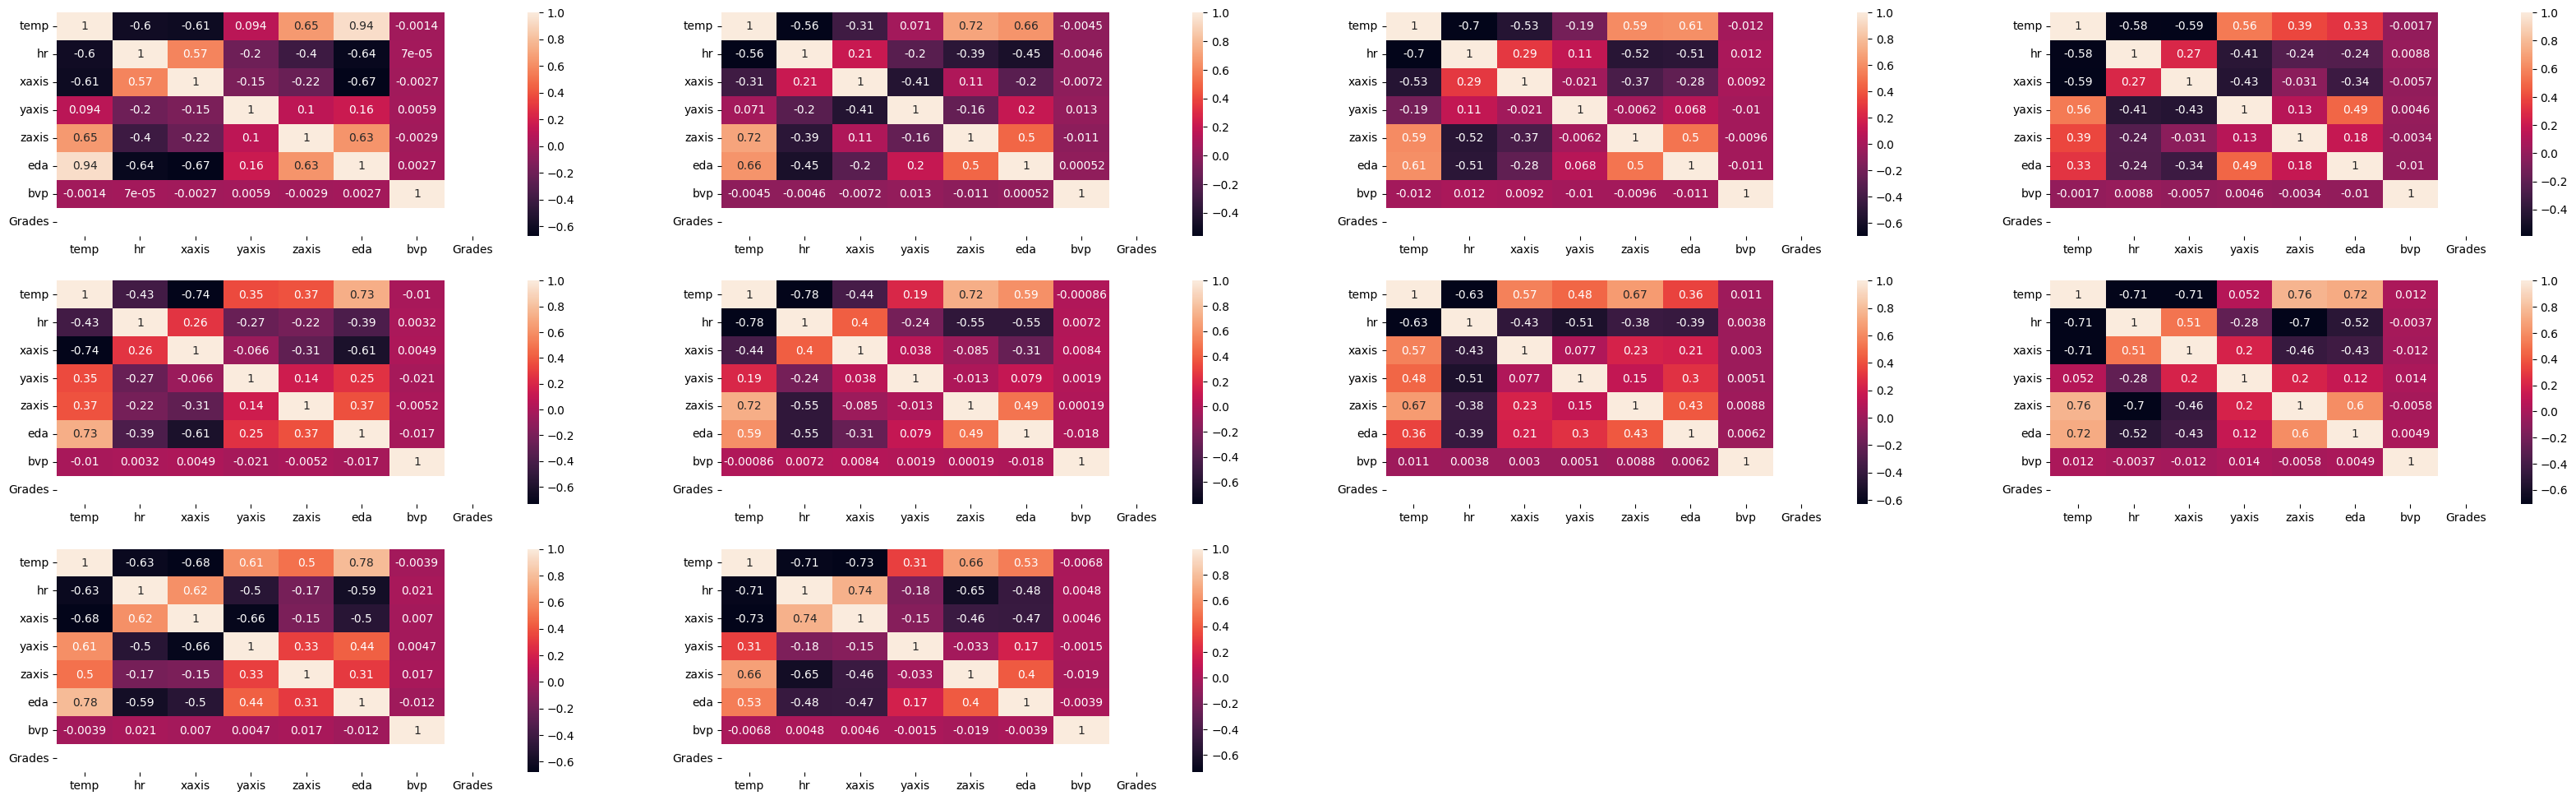

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 12))
count = 1

for df_name, df in dict_of_df.items():
    plt.subplot(3, 4, count)
    final_df = df[df['ExamType'] == 'Final']  # Filter DataFrame for 'Final' exam type
    numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns
    ax = sns.heatmap(final_df[numeric_columns].corr(), annot=True)
    count += 1


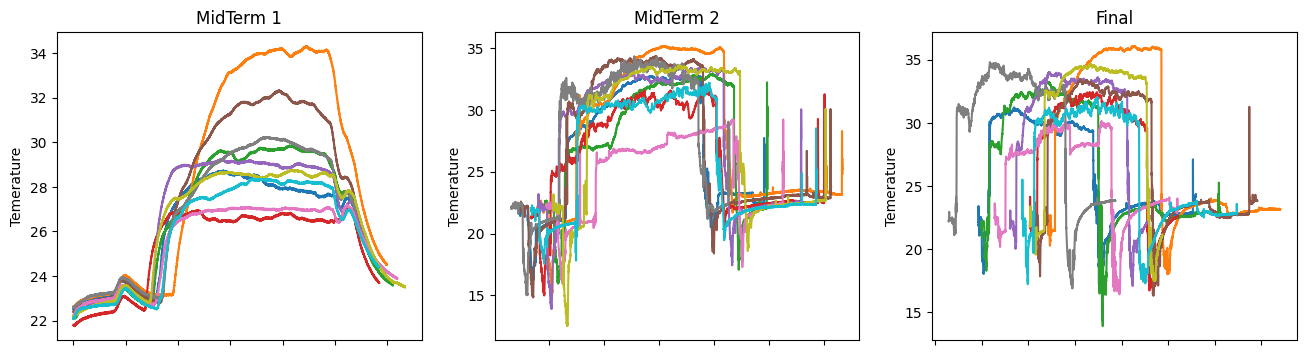

In [39]:
#Temperature of each Student during exams
plt.figure(figsize=(16, 4))

for df_name,df in dict_of_df.items():
  plt.subplot(1,3,1)
  plt.plot(df.loc[df['ExamType']=='Midterm 1']['temp'])
  plt.title('MidTerm 1')
  plt.ylabel('Temerature')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(1,3,2)
  plt.plot(df.loc[df['ExamType']=='Midterm 2']['temp'])
  plt.title('MidTerm 2')
  plt.ylabel('Temerature')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(1,3,3)
  plt.plot(df.loc[df['ExamType']=='Final']['temp'])
  plt.title('Final')
  plt.ylabel('Temerature')
  plt.xticks(visible=False)

plt.show()

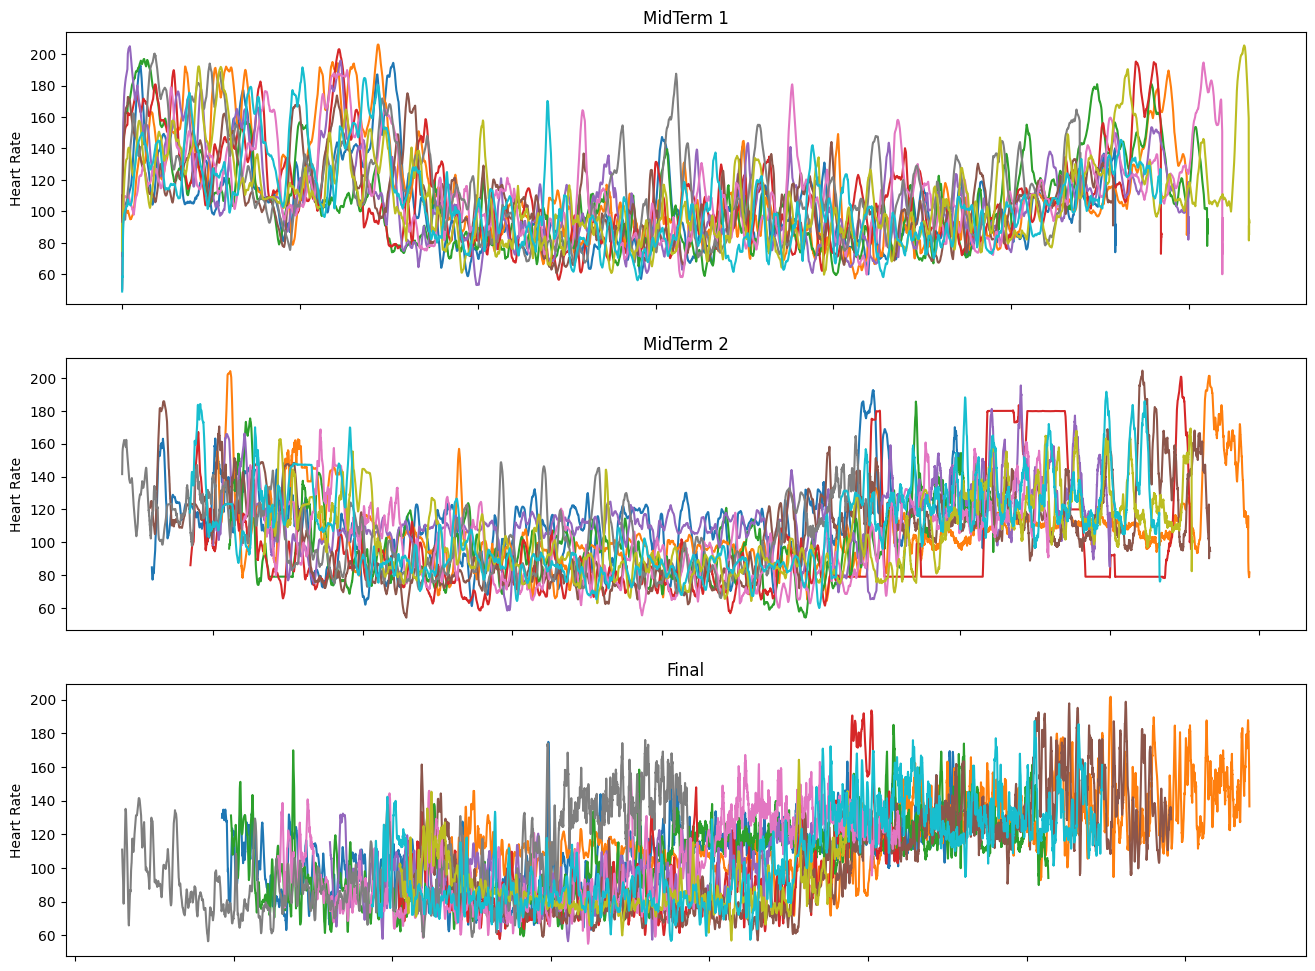

In [40]:

#Heart Rate of each Student during exams
plt.figure(figsize=(16, 12))

for df_name,df in dict_of_df.items():
  plt.subplot(3,1,1)
  plt.plot(df.loc[df['ExamType']=='Midterm 1']['hr'])
  plt.title('MidTerm 1')
  plt.ylabel('Heart Rate')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(3,1,2)
  plt.plot(df.loc[df['ExamType']=='Midterm 2']['hr'])
  plt.title('MidTerm 2')
  plt.ylabel('Heart Rate')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(3,1,3)
  plt.plot(df.loc[df['ExamType']=='Final']['hr'])
  plt.title('Final')
  plt.ylabel('Heart Rate')
  plt.xticks(visible=False)

plt.show()

In [41]:
# Create empty lists to store average heart rate values for each exam type
avg_hr_midterm1 = []
avg_hr_midterm2 = []
avg_hr_final = []

# Iterate over each DataFrame containing physiological data
for df_name, df in dict_of_df.items():
    # Calculate average heart rate for each exam type
    avg_hr_midterm1.append(df.loc[df['ExamType'] == 'Midterm 1']['hr'].mean().round(1))
    avg_hr_midterm2.append(df.loc[df['ExamType'] == 'Midterm 2']['hr'].mean().round(1))
    avg_hr_final.append(df.loc[df['ExamType'] == 'Final']['hr'].mean().round(1))

# Print or use the arrays as needed
print("Average Heart Rate for Midterm 1:", avg_hr_midterm1)
print("Average Heart Rate for Midterm 2:", avg_hr_midterm2)
print("Average Heart Rate for Final:", avg_hr_final)


Average Heart Rate for Midterm 1: [103.1, 111.5, 105.7, 110.6, 108.2, 107.1, 112.4, 113.7, 108.3, 106.6]
Average Heart Rate for Midterm 2: [111.0, 106.6, 97.5, 94.8, 113.3, 104.7, 99.0, 102.7, 103.1, 107.4]
Average Heart Rate for Final: [106.1, 120.0, 104.5, 92.6, 95.4, 103.9, 101.2, 102.1, 86.7, 105.5]


In [42]:
# Create empty lists to store average temperature values for each exam type
avg_temp_midterm1 = []
avg_temp_midterm2 = []
avg_temp_final = []

# Iterate over each DataFrame containing physiological data
for df_name, df in dict_of_df.items():
    # Calculate average temperature for each exam type
    avg_temp_midterm1.append(df.loc[df['ExamType'] == 'Midterm 1']['temp'].mean().round(1))
    avg_temp_midterm2.append(df.loc[df['ExamType'] == 'Midterm 2']['temp'].mean().round(1))
    avg_temp_final.append(df.loc[df['ExamType'] == 'Final']['temp'].mean().round(1))

# Print or use the arrays as needed
print("Average Temperature for Midterm 1:", avg_temp_midterm1)
print("Average Temperature for Midterm 2:", avg_temp_midterm2)
print("Average Temperature for Final:", avg_temp_final)


Average Temperature for Midterm 1: [26.4, 28.7, 26.7, 25.4, 26.8, 28.0, 25.5, 27.1, 26.4, 26.0]
Average Temperature for Midterm 2: [27.1, 27.9, 28.1, 26.2, 28.2, 26.9, 24.9, 28.5, 27.9, 26.1]
Average Temperature for Final: [26.2, 28.2, 26.5, 28.4, 30.2, 27.0, 26.0, 29.3, 30.8, 26.3]


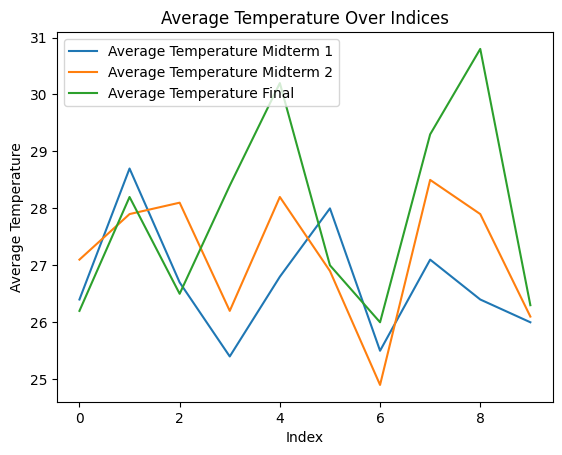

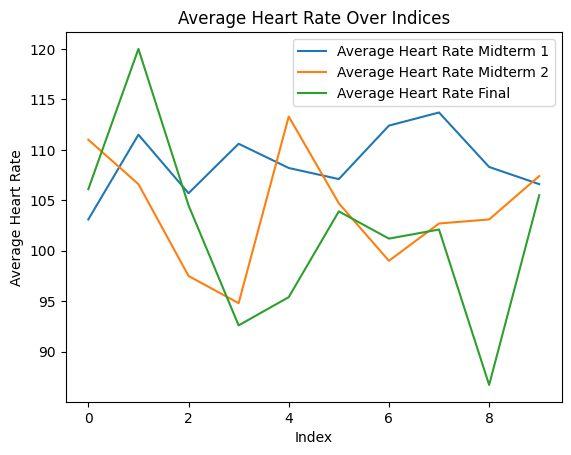


Correlation between Average Heart Rate and Exam Grades:
Midterm 1: 0.07
Midterm 2: 0.15
Final: 0.44

Correlation between Average Temperature and Exam Grades:
Midterm 1: 0.19
Midterm 2: 0.59
Final: 0.01


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Provided grades data
grades = {
    "Midterm 1": [78, 82, 77, 75, 67, 71, 64, 92, 80, 89],
    "Midterm 2": [82, 85, 90, 77, 77, 64, 33, 88, 39, 64],
    "Final": [182, 180, 188, 149, 157, 175, 110, 184, 126, 116]
}

# Creating a DataFrame from the grades data
grades_df = pd.DataFrame(grades)

# Plotting physiological responses over indices
plt.plot(grades_df.index, avg_temp_midterm1, label='Average Temperature Midterm 1')
plt.plot(grades_df.index, avg_temp_midterm2, label='Average Temperature Midterm 2')
plt.plot(grades_df.index, avg_temp_final, label='Average Temperature Final')
plt.xlabel('Index')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Indices')
plt.legend()
plt.show()

plt.plot(grades_df.index, avg_hr_midterm1, label='Average Heart Rate Midterm 1')
plt.plot(grades_df.index, avg_hr_midterm2, label='Average Heart Rate Midterm 2')
plt.plot(grades_df.index, avg_hr_final, label='Average Heart Rate Final')
plt.xlabel('Index')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate Over Indices')
plt.legend()
plt.show()

# Calculating correlation coefficients between physiological markers and exam grades
print("\nCorrelation between Average Heart Rate and Exam Grades:")
for exam_type, avg_hr in zip(grades.keys(), [avg_hr_midterm1, avg_hr_midterm2, avg_hr_final]):
    corr_coef_hr = np.corrcoef(avg_hr, grades[exam_type])[0, 1]
    print(f"{exam_type}: {corr_coef_hr:.2f}")

print("\nCorrelation between Average Temperature and Exam Grades:")
for exam_type, avg_temp in zip(grades.keys(), [avg_temp_midterm1, avg_temp_midterm2, avg_temp_final]):
    corr_coef_temp = np.corrcoef(avg_temp, grades[exam_type])[0, 1]
    print(f"{exam_type}: {corr_coef_temp:.2f}")


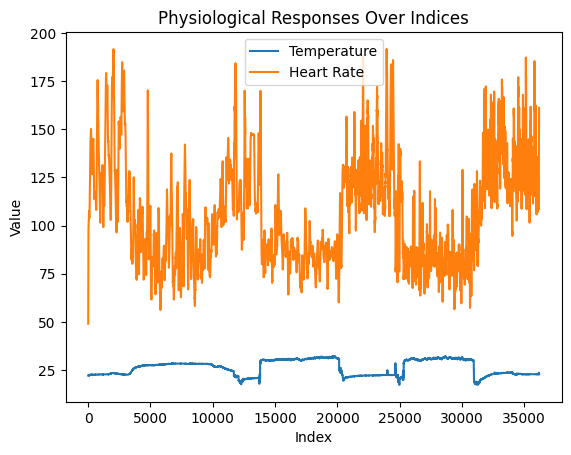

In [44]:
# Plotting physiological responses over indices assuming each row represents a measurement
plt.plot(df.index, df['temp'], label='Temperature')
plt.plot(df.index, df['hr'], label='Heart Rate')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Physiological Responses Over Indices')
plt.legend()
plt.show()

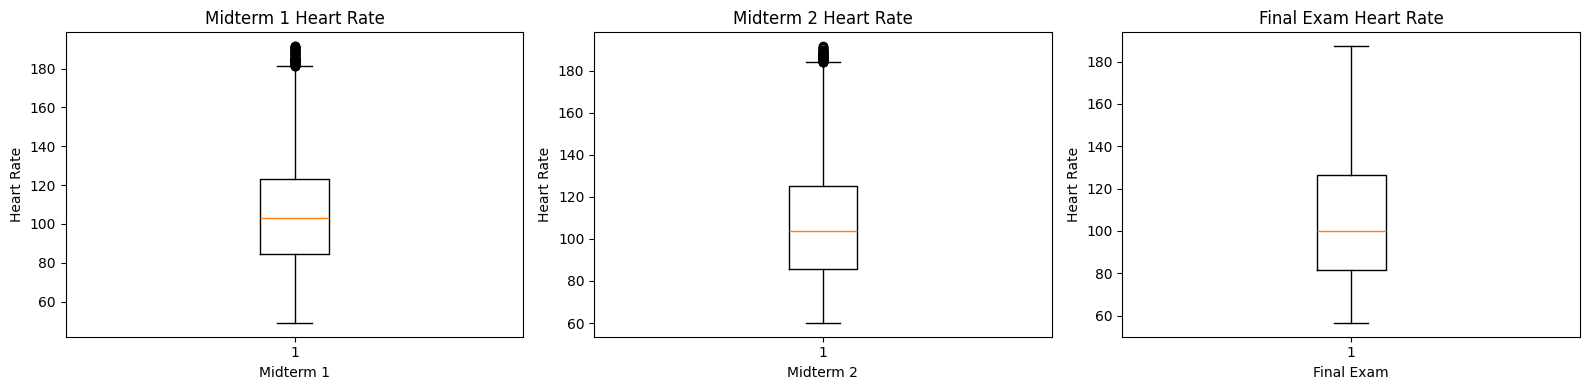

In [45]:
import matplotlib.pyplot as plt

# Extract heart rate data for student S10
hr_data_midterm1 = dict_of_df['S10'].loc[dict_of_df['S10']['ExamType'] == 'Midterm 1', 'hr']
hr_data_midterm2 = dict_of_df['S10'].loc[dict_of_df['S10']['ExamType'] == 'Midterm 2', 'hr']
hr_data_final = dict_of_df['S10'].loc[dict_of_df['S10']['ExamType'] == 'Final', 'hr']

# Plotting boxplots for heart rate data across exam types
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.boxplot(hr_data_midterm1)
plt.title('Midterm 1 Heart Rate')
plt.xlabel('Midterm 1')
plt.ylabel('Heart Rate')

plt.subplot(1, 3, 2)
plt.boxplot(hr_data_midterm2)
plt.title('Midterm 2 Heart Rate')
plt.xlabel('Midterm 2')
plt.ylabel('Heart Rate')

plt.subplot(1, 3, 3)
plt.boxplot(hr_data_final)
plt.title('Final Exam Heart Rate')
plt.xlabel('Final Exam')
plt.ylabel('Heart Rate')

plt.tight_layout()
plt.show()


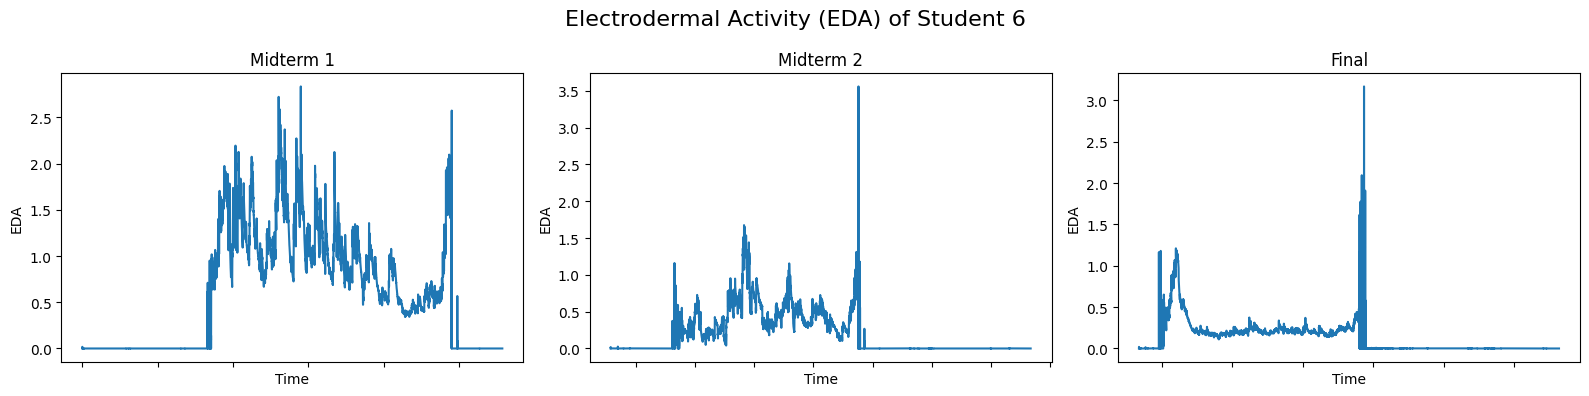

In [46]:
import matplotlib.pyplot as plt

# Define the function to plot EDA data for a specific student and exam type
def plot_eda(student_data, exam_type):
    plt.plot(student_data.loc[student_data['ExamType'] == exam_type, 'eda'])
    plt.title(exam_type)
    plt.ylabel('EDA')
    plt.xlabel('Time')
    plt.xticks(visible=False)

# Plotting EDA data for student 6
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plot_eda(dict_of_df['S6'], 'Midterm 1')

plt.subplot(1, 3, 2)
plot_eda(dict_of_df['S6'], 'Midterm 2')

plt.subplot(1, 3, 3)
plot_eda(dict_of_df['S6'], 'Final')

plt.suptitle('Electrodermal Activity (EDA) of Student 6', fontsize=16)
plt.tight_layout()
plt.show()


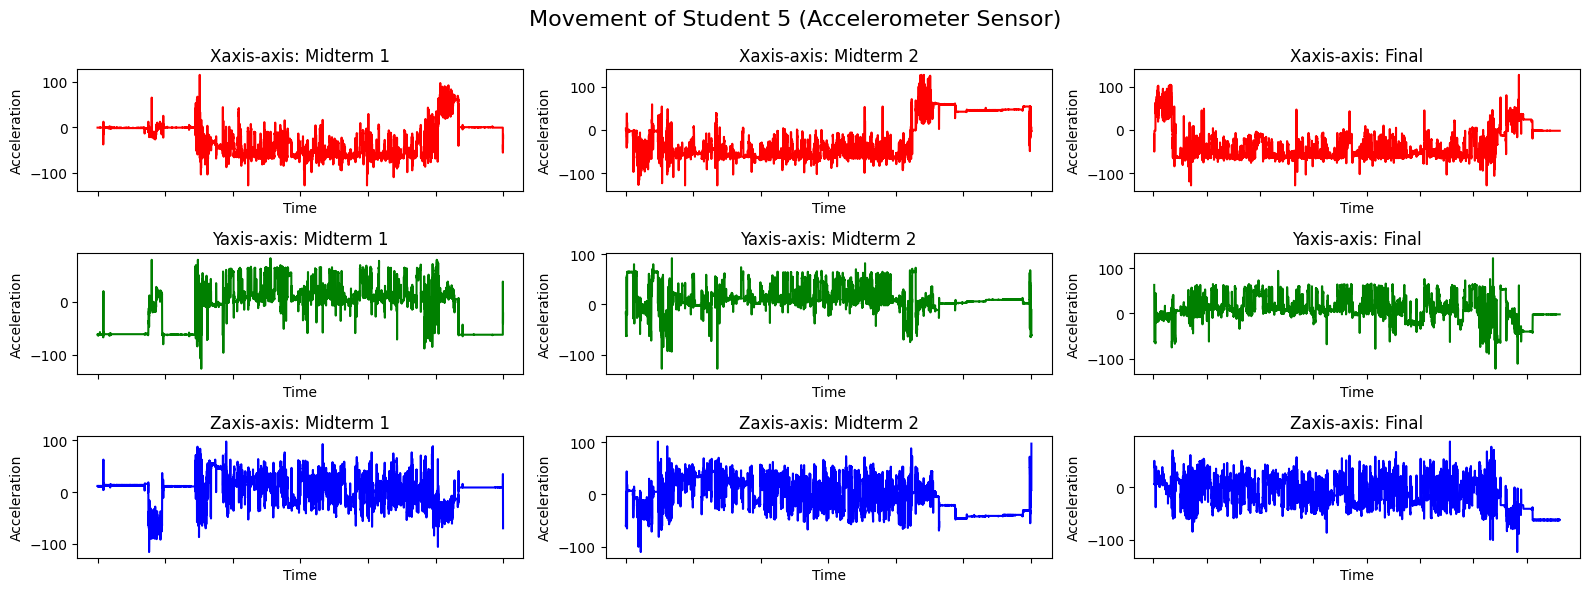

In [47]:
import matplotlib.pyplot as plt

# Define the function to plot accelerometer data for a specific student and axis
def plot_acceleration(student_data, exam_type, axis):
    plt.plot(student_data.loc[student_data['ExamType'] == exam_type, axis], color='r' if axis == 'xaxis' else 'g' if axis == 'yaxis' else 'b')
    plt.title(f'{axis.capitalize()}-axis: {exam_type}')
    plt.ylabel('Acceleration')
    plt.xlabel('Time')
    plt.xticks(visible=False)

# Plotting accelerometer data for student 5
plt.figure(figsize=(16, 6))
count = 1

for exam in exams:
    plt.subplot(3, 3, count)
    plot_acceleration(dict_of_df['S5'], exam, 'xaxis')
    count += 1

for exam in exams:
    plt.subplot(3, 3, count)
    plot_acceleration(dict_of_df['S5'], exam, 'yaxis')
    count += 1

for exam in exams:
    plt.subplot(3, 3, count)
    plot_acceleration(dict_of_df['S5'], exam, 'zaxis')
    count += 1

plt.suptitle('Movement of Student 5 (Accelerometer Sensor)', fontsize=16)
plt.tight_layout()
plt.show()


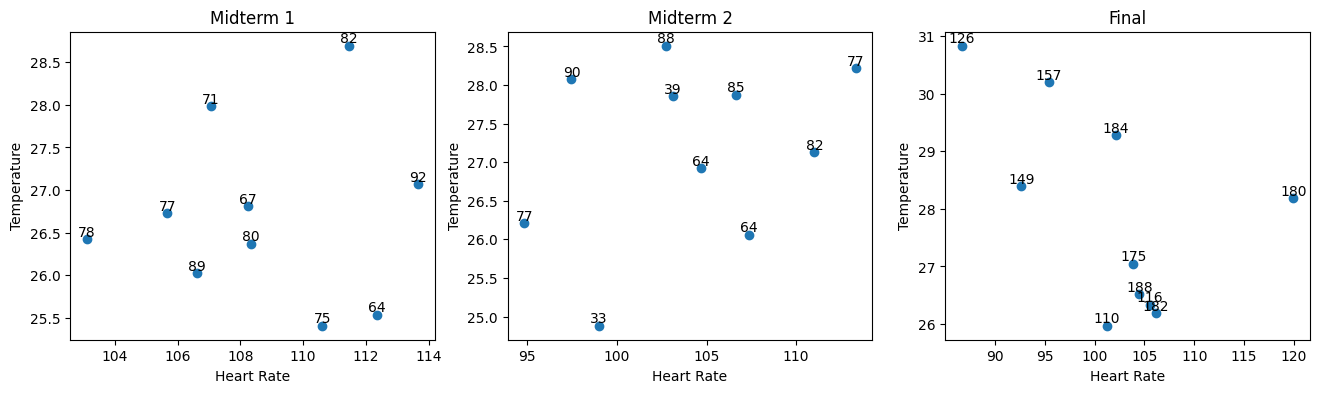

In [48]:
#Grades of student compared to Heart rate and Temperature
fig = plt.figure(figsize=(16, 4))

grades = {
"Midterm 1": [78,82,77,75,67,71,64,92,80,89],
"Midterm 2": [82,85,90,77,77,64,33,88,39,64],
"Final": [182,180,188,149,157,175,110,184,126,116]
}

count=1

for grade_key,grade_value in grades.items():
  Avg_HR=[]
  Avg_Temp=[]
  for df_name,df in dict_of_df.items():
    Avg_Temp.append(df.loc[df['ExamType']==grade_key]['temp'].mean())
    Avg_HR.append(df.loc[df['ExamType']==grade_key]['hr'].mean())
  # plotting
  plt.subplot(1, 3, count)
  plt.scatter(Avg_HR,Avg_Temp)
  # putting grades on each point
  for (xi, yi, grade) in zip(Avg_HR,Avg_Temp,grade_value):
    plt.text(xi, yi, grade, va='bottom', ha='center')
  plt.xlabel('Heart Rate')
  plt.ylabel('Temperature')
  plt.title(grade_key)
  count+=1

plt.show()

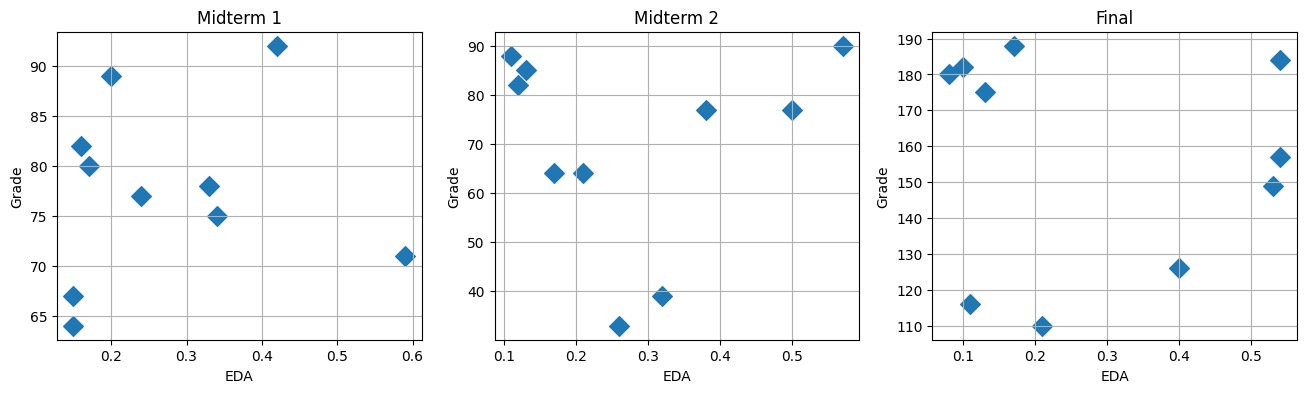

In [49]:
#Grades of student compared to EDA sensor data
fig = plt.figure(figsize=(16, 4))
count=1
for grade_key,grade_value in grades.items():
  AVG_EDA=[]
  for df_name,df in dict_of_df.items():
    AVG_EDA.append(df.loc[df['ExamType']==grade_key]['eda'].mean().round(2))
  plt.subplot(1, 3, count)
  plt.scatter(AVG_EDA,grade_value, marker='D',s=100)
  plt.xlabel('EDA')
  plt.ylabel('Grade')
  plt.title(grade_key)
  plt.grid()
  count+=1

In [50]:
import pandas as pd

# Assuming you have already collected data into the variables TEMP, HR, ACC, EDA, and BVP
# Combining all parameters for each exam type for each student
feature_dfs = []
for stud in students:
    for exam in exams:
        temp_df = TEMP.copy()
        temp_df['ExamType'] = exam
        hr_df = HR.copy()
        acc_df = ACC.copy()
        eda_df = EDA.copy()
        bvp_df = BVP.copy()
        combined_df = pd.concat([temp_df, hr_df, acc_df, eda_df, bvp_df], axis=1)
        feature_dfs.append(combined_df)

# Concatenating all student data into a single DataFrame
feature_data = pd.concat(feature_dfs, ignore_index=True)

# Assuming you have collected grades data into a separate dictionary
grades = {
    "Midterm 1": [78, 82, 77, 75, 67, 71, 64, 92, 80, 89],
    "Midterm 2": [82, 85, 90, 77, 77, 64, 33, 88, 39, 64],
    "Final": [182, 180, 188, 149, 157, 175, 110, 184, 126, 116]
}

# Concatenating grades for all students into a single DataFrame
grades_df = pd.DataFrame(grades)

# Now, you can use 'feature_data' as your X_train and 'grades_df' as your y_train
X_train = feature_data
y_train = grades_df


In [51]:
print(feature_data)
print(grades_df)

          ExamType   temp     hr  xaxis  yaxis  zaxis       eda    bvp
0        Midterm 1  22.11  49.00    0.0  -61.0   12.0  0.000000  -0.00
1        Midterm 1  22.11  53.00    0.0  -63.0   12.0  0.017939  15.70
2        Midterm 1  22.11  56.67    0.0  -63.0   12.0  0.019220 -25.54
3        Midterm 1  22.13  57.75    0.0  -63.0   12.0  0.019220  18.56
4        Midterm 1  22.09  58.80    0.0  -63.0   12.0  0.017939   9.76
...            ...    ...    ...    ...    ...    ...       ...    ...
1580365        NaN    NaN    NaN    NaN    NaN    NaN       NaN   8.74
1580366        NaN    NaN    NaN    NaN    NaN    NaN       NaN   7.95
1580367        NaN    NaN    NaN    NaN    NaN    NaN       NaN -47.49
1580368        NaN    NaN    NaN    NaN    NaN    NaN       NaN   1.59
1580369        NaN    NaN    NaN    NaN    NaN    NaN       NaN  -4.88

[1580370 rows x 8 columns]
   Midterm 1  Midterm 2  Final
0         78         82    182
1         82         85    180
2         77         90    